## Exploring College Rank

To reproduce this analysis you'll need to [prepare your environment](https://github.com/fdudatamining/system). Alternatively you can [install the framework](https://github.com/fdudatamining/framework) and [obtain the data](https://github.com/fdudatamining/data) separately.

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from framework.draw import *
from framework.data import *
from scipy.stats import spearmanr

In [2]:
df = pd.read_sql('''
select
    `Provider Number`,
    `Rank`,
    `Total Performance Score`
from
    `medical_college_costs_ranks_complete` as ms,
    `hospital_practitioners` as hp
where
    hp.`Medical school name` = ms.`SCHOOL`;
''', sql('datamining'))

In [489]:
hospitals = pd.read_sql('''
select
    `Provider Number`,
    `Hospital Name`
from
    hospitals;
''', sql('datamining'))

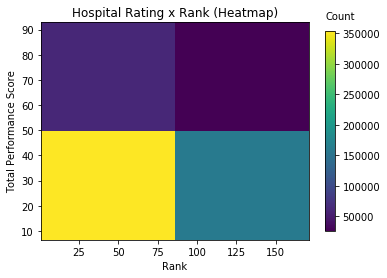

Rank,"(0.83, 86]","(86, 171]"
Total Performance Score,,
"(6.514, 49.729]",353916,160922
"(49.729, 92.857]",62509,25423


In [48]:
# Sanity Check
aggregate_bins(df=df.dropna(),
               x='Rank', xlabel='Rank',
               y='Total Performance Score', ylabel='Total Performance Score',
               n=2,
               title='Hospital Rating x Rank (Heatmap)',
               show=True)

/home/ravirao/Scripts/framework/draw.py:336: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



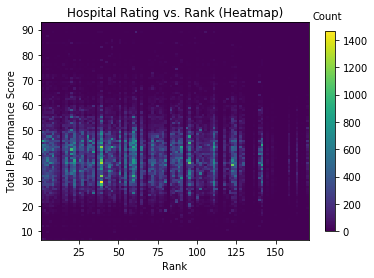

Rank,"(0.83, 2.7]","(2.7, 4.4]","(4.4, 6.1]","(6.1, 7.8]","(7.8, 9.5]","(9.5, 11.2]","(11.2, 12.9]","(12.9, 14.6]","(14.6, 16.3]","(16.3, 18]",...,"(154, 155.7]","(155.7, 157.4]","(157.4, 159.1]","(159.1, 160.8]","(160.8, 162.5]","(162.5, 164.2]","(164.2, 165.9]","(165.9, 167.6]","(167.6, 169.3]","(169.3, 171]"
Total Performance Score,,,,,,,,,,,,,,,,,,,,,
"(6.514, 7.463]",61.0,33.0,3.0,7.0,2.0,9.0,6.0,1.0,16.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
"(7.463, 8.325]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(8.325, 9.188]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(9.188, 10.0503]",8.0,1.0,25.0,2.0,2.0,4.0,4.0,1.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
"(10.0503, 10.913]",4.0,2.0,3.0,2.0,3.0,2.0,2.0,0.0,4.0,6.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"(10.913, 11.775]",3.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"(11.775, 12.638]",56.0,8.0,29.0,7.0,4.0,9.0,3.0,1.0,20.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(12.638, 13.501]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(13.501, 14.363]",9.0,11.0,8.0,25.0,4.0,4.0,5.0,0.0,7.0,4.0,...,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0


In [374]:
# Hospital Rating x Rank (Heatmap)
aggregate_bins(df=df.dropna(),
               x='Rank', xlabel='Rank',
               y='Total Performance Score', ylabel='Total Performance Score',
               n=10,
               title='Hospital Rating vs. Rank (Heatmap)',
#                save='hospital_rating_vs_rank_heatmap.png', dpi=300,
               show=True)

/home/ravirao/Scripts/framework/draw.py:335: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



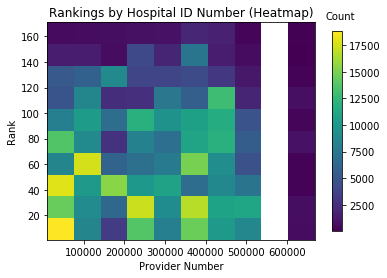

Provider Number,"(9340.916, 76009.4]","(76009.4, 142017.8]","(142017.8, 208026.2]","(208026.2, 274034.6]","(274034.6, 340043]","(340043, 406051.4]","(406051.4, 472059.8]","(472059.8, 538068.2]","(538068.2, 604076.6]","(604076.6, 670085]"
Rank,,,,,,,,,,
"(0.83, 18]",18832.0,8565.0,3284.0,13802.0,8176.0,14614.0,10128.0,8700.0,NaN,621.0
"(18, 35]",14443.0,9127.0,6392.0,17316.0,9167.0,16784.0,10966.0,11116.0,NaN,744.0
"(35, 52]",17927.0,10184.0,15519.0,10048.0,10835.0,6744.0,8834.0,7230.0,NaN,215.0
"(52, 69]",8574.0,17610.0,6015.0,6948.0,7735.0,14983.0,9224.0,4718.0,NaN,184.0
"(69, 86]",13699.0,8986.0,2820.0,8269.0,6901.0,11018.0,11936.0,5541.0,NaN,951.0
"(86, 103]",8135.0,10315.0,6774.0,11994.0,9603.0,10710.0,11689.0,4864.0,NaN,362.0
"(103, 120]",4935.0,8634.0,2510.0,2617.0,7464.0,5690.0,12997.0,1948.0,NaN,807.0
"(120, 137]",5252.0,5873.0,9017.0,3959.0,3945.0,4301.0,3076.0,1231.0,NaN,184.0
"(137, 154]",1561.0,1529.0,686.0,4196.0,2011.0,7327.0,1433.0,664.0,NaN,32.0


In [260]:
# Rankings by Hospital ID Number (Heatmap)
aggregate_bins(df=df.dropna(),
               x='Provider Number', xlabel='Provider Number',
               y='Rank', ylabel='Rank',
               n=[10, 10],
               title='Rankings by Hospital ID Number (Heatmap)',
               save='ranking_by_hospital_id_heatmap.png', dpi=300,
               show=True)

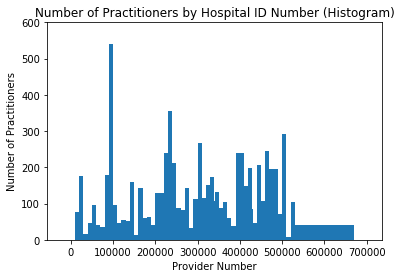

In [23]:
# Number of Practitioners by Hospital ID Number (Histogram)
draw(kind='hist', ylabel='Number of Practitioners',
     x=df['Provider Number'], xlabel='Provider Number',
     bins=df['Provider Number'].unique(),
     title='Number of Practitioners by Hospital ID Number (Histogram)',
     ylim=(0, 600), save='practitoners_by_hospital_id_number_histogram.png', dpi=300,
     show=True)

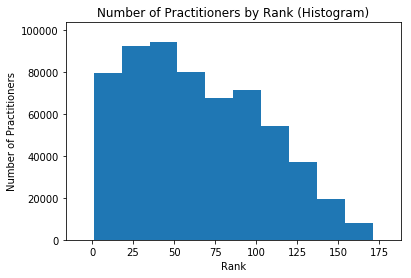

In [114]:
# Number of Practitioners by Rank (Histogram)
draw(kind='hist', ylabel='Number of Practitioners',
     x=df['Rank'], xlabel='Rank',
     bins=10,
     title='Number of Practitioners by Rank (Histogram)',
#      save='practitioners_by_rank_histogram.png', dpi=300,
     show=True)

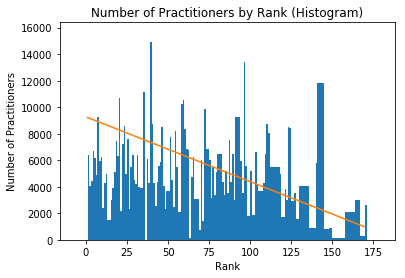

In [111]:
# Number of Practitioners by Rank (Histogram)
draw(kind='hist', ylabel='Number of Practitioners',
     x=df['Rank'], xlabel='Rank',
     bins=sorted(df['Rank'].unique()),
     title='Number of Practitioners by Rank (Histogram)',
#      save='practitioners_by_rank_histogram.png', dpi=300,
     show=True)

In [26]:
schools = pd.read_sql('''
select distinct
    `Rank`,
    `School`
from
    `medical_schools_social_mission_rank`;
''', sql('datamining_source'))

In [27]:
practitioner_schools = pd.read_sql('''
select distinct
    `Medical school name`
from
    `practitioners`;
''', sql('datamining'))

In [32]:
schools['School']=schools['School'].apply(str.upper)

In [36]:
d=pd.merge(left=schools, left_on='School', right=practitioner_schools, right_on='Medical school name', how='outer')

In [44]:
practitioner_schools_= practitioner_schools['Medical school name'].unique()
list(sorted([school for school in d['School'].unique() if type(school)==str and school not in practitioner_schools_]))

['A.T. STILL UNIVERSITY',
 'ALBANY MEDICAL COLLEGE',
 'BAYLOR COLLGE OF MEDICINE',
 'BOSTON UNIVERSITY',
 'BROWN UNIVERSITY ALPERT MEDICAL SCHOOL',
 'CASE WESTERN RESERVE UNIVERSITY',
 'CHICAGO COM MIDWESTERN',
 'COLUMBIA UNIVERSITY',
 'CREIGHTON UNIVERSITY',
 'DARTMOUTH COLLEGE',
 'DES MOINES COM',
 'DREXEL UNIVERSITY',
 'DUKE UNIVERSITY',
 'EAST CAROLINA UNIVERSITY BRODY SCHOOL OF MEDICINE',
 'EAST TENNESSEE STATE UNIVERSITY QUILLEN COLLEGE OF MEDICINE',
 'EMORY UNIVERSITY',
 'GEORGE WASHINGTON UNIVERSITY',
 'GEORGETOWN UNIVERSITY',
 'HARVARD UNIVERSITY',
 'HOWARD UNIVERSITY',
 'INDIANA UNIVERSITY',
 'JOHNS HOPKINS UNIVERSITY',
 'KANSAS CITY COM',
 'LAKE ERIE COM P',
 'LOMA LINDA UNIVERSITY',
 'LOUISIANA STATE UNIVERSITY',
 'LOYOLA UNIVERSITY STRITCH SCHOOL OF MEDICINE',
 'MARSHALL UNIVERSITY JOAN C. EDWARDS UNIVERSITY    ',
 'MAYO CLINIC',
 'MEDICAL UNIVERSITY OF SOUTH CAROLINA',
 'MEHARRY MEDICAL COLLEGE',
 'MERCER UNIVERSITY',
 'MICHIGAN STATE COM',
 'MICHIGAN STATE UNIVERSITY**',

In [45]:
list(sorted(practitioner_schools_))

['A T STILL UN, ARIZONA SCHL OF DENT.Y & ORAL HLTH',
 'ADIO/PENNSYLVANIA INSTITUTE OF STRAIGHT CHIROPRACTIC',
 'ALBANY MEDICAL COLLEGE OF UNION UNIVERSITY',
 'ALBERT EINSTEIN COLLEGE OF MEDICINE OF YESHIVA UNIVERSITY',
 'AMERICAN MEDICAL MISSIONARY COLLEGE',
 'ARIZONA COLLEGE OF OSTEOPATHIC MEDICINE MID WESTERN UNIVERSITY',
 'ATLANTA COLLEGE OF PHYSICIANS AND SURGEONS',
 'ATLANTA SCHOOL OF MEDICINE',
 'ATLANTIC MEDICAL COLLEGE',
 'ATLANTIC STATES/COLUMBIA CHIROPRACTIC INSTITUTE',
 'BALTIMORE MEDICAL COLLEGE',
 'BALTIMORE UNIVERSITY SCHOOL OF MEDICINE',
 'BARNES MEDICAL COLLEGE',
 'BARRY UNIVERSITY SCHOOL PODIATRIC MEDICINE',
 'BAYLOR COLLEGE OF DENTISTRY/TEXAS A AND M UNIVERSITY',
 'BAYLOR COLLEGE OF MEDICINE',
 'BEAUMONT HOSPITAL MEDIAL COLLEGE - NLG',
 'BEBOUT COLLEGE OF CHIROPRACTIC',
 'BELLEVUE HOSPITAL MEDICAL COLLEGE',
 'BENNETT MEDICAL SCHOOL',
 'BERKELEY NORTHEASTERN STATE UNIVERSITY - COLLEGE  OF MEDICINE',
 'BIRMINGHAM MEDICAL COLLEGE',
 'BOOKER T. WASHINGTON COLLEGE OF CHIRO

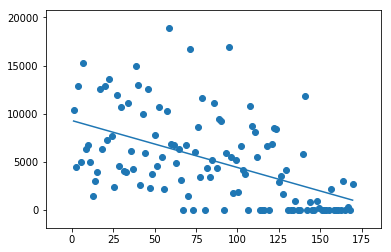

poly1d([  -48.84140081,  9273.39844397])

In [105]:
y,x=np.histogram(df['Rank'], len(df['Rank'].unique()))
x=x[:-1]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
draw(kind='scatter',
     x=x, y=y)
draw(kind='plot',
     x=x, y=p(x), show=True)

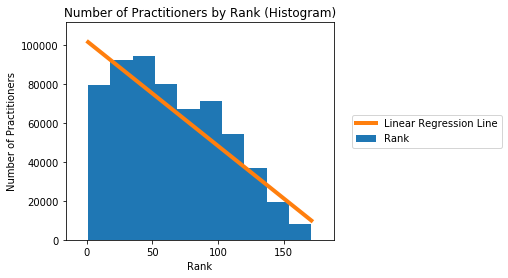

 
-538.7 x + 1.02e+05
SpearmanrResult(correlation=-0.90303030303030285, pvalue=0.00034361219776328223)


In [149]:
# Number of Practitioners by Rank (Histogram)
bins=10
y,x=np.histogram(df['Rank'], bins)
# x=x[:-1]
z = np.polyfit(x[:-1], y, 1)
p = np.poly1d(z)
draw(kind='hist', ylabel='Number of Practitioners',
     x=df['Rank'], xlabel='Rank',
     bins=bins,
     title='Number of Practitioners by Rank (Histogram)')
draw(kind='plot',
     x=x, y=p(x), label='Linear Regression Line',
     legend='right', linewidth=4,
     save='practitioners_by_rank_histogram_with_regression_bins_10.png', dpi=300,
     show=True)
print(p, spearmanr(x[:-1], y), sep='\n')

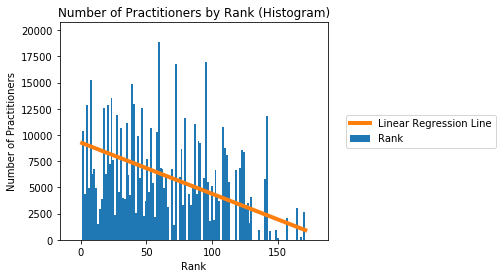

 
-48.84 x + 9273
SpearmanrResult(correlation=-0.56890012165635284, pvalue=1.8046861875725163e-11)


In [150]:
# Number of Practitioners by Rank (Histogram)
bins=len(df['Rank'].unique())
y,x=np.histogram(df['Rank'], bins)
# x=x[:-1]
z = np.polyfit(x[:-1], y, 1)
p = np.poly1d(z)
draw(kind='hist', ylabel='Number of Practitioners',
     x=df['Rank'], xlabel='Rank',
     bins=bins,
     title='Number of Practitioners by Rank (Histogram)')
draw(kind='plot',
     x=x, y=p(x), label='Linear Regression Line',
     legend='right', linewidth=4,
     save='practitioners_by_rank_histogram_with_regression.png', dpi=300,
     show=True)
print(p, spearmanr(x[:-1], y), sep='\n')

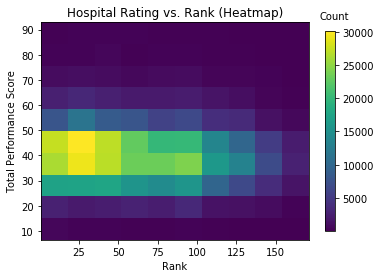

In [152]:
a = aggregate_bins(df=df.dropna(),
               x='Rank', xlabel='Rank',
               y='Total Performance Score', ylabel='Total Performance Score',
               n=10,
               title='Hospital Rating vs. Rank (Heatmap)',
               save='hospital_rating_vs_rank_heatmap.png', dpi=300,
               show=True)

In [163]:
df.dropna().count()

Provider Number            602770
Rank                       602770
Total Performance Score    602770
dtype: int64

In [173]:
df.dropna()['Rank'].mean()

62.98007200092904

In [174]:
df.dropna()['Total Performance Score'].mean()

40.139217019767806

In [180]:
a

Rank,"(0.83, 18]","(18, 35]","(35, 52]","(52, 69]","(69, 86]","(86, 103]","(103, 120]","(120, 137]","(137, 154]","(154, 171]"
Total Performance Score,,,,,,,,,,
"(6.514, 15.226]",525,297,293,204,220,283,186,120,86,26
"(15.226, 23.851]",2759,2130,2413,2876,2434,3509,1535,1418,983,267
"(23.851, 32.477]",17390,17493,17708,15592,14562,15753,9804,6643,3870,1598
"(32.477, 41.103]",26319,29313,26986,23377,23384,24251,16069,13312,6934,2781
"(41.103, 49.729]",27501,30107,27096,22824,20113,20170,13653,9960,5374,2337
"(49.729, 58.354]",8004,11632,8601,7919,5902,6699,3990,3595,1401,705
"(58.354, 66.98]",2604,3345,2617,2139,2207,2275,1558,1126,444,219
"(66.98, 75.606]",1045,1149,998,650,868,999,444,452,249,51
"(75.606, 84.231]",347,335,550,150,296,283,177,155,74,25


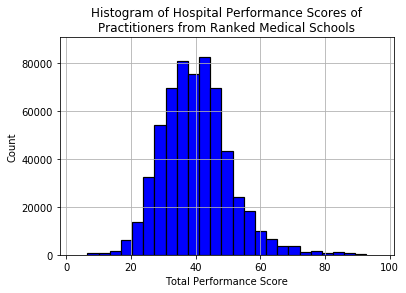

In [211]:
# Number of Practitioners by Hospital ID Number (Histogram)
draw(kind='hist', ylabel='Count',
     x=df.dropna()['Total Performance Score'], xlabel='Total Performance Score',
     bins=25, edgecolor='black', linewidth=1.2,
     grid='both', color='b',
     title='Histogram of Hospital Performance Scores of\nPractitioners from Ranked Medical Schools',
     save='histogram_of_hospital_performance_scors_of_practitioners_from_ranked_medical_schools.png', dpi=300,
     show=True)

In [212]:
print(df.dropna()['Total Performance Score'].mean(), df.dropna()['Total Performance Score'].median())

40.139217019767806 39.3909


/home/ravirao/Scripts/framework/draw.py:335: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



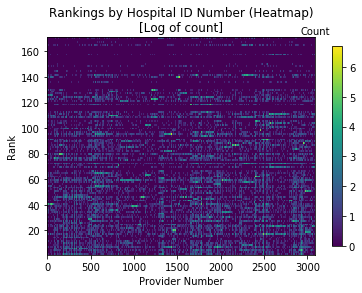

Provider Number New,"(-3.087, 1]","(1, 1.999]","(1.999, 2.999]","(2.999, 3.999]","(3.999, 4.998]","(4.998, 5.998]","(5.998, 6.998]","(6.998, 7.997]","(7.997, 8.997]","(8.997, 9.997]",...,"(3077.00324, 3078.00291]","(3078.00291, 3079.00259]","(3079.00259, 3080.00227]","(3080.00227, 3081.00194]","(3081.00194, 3082.00162]","(3082.00162, 3083.0013]","(3083.0013, 3084.000972]","(3084.000972, 3085.000648]","(3085.000648, 3086.000324]","(3086.000324, 3087]"
Rank,,,,,,,,,,,,,,,,,,,,,
"(0.83, 2.441]",0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,1.098612,0.693147,0.000000,...,0.000000,0.693147,1.098612,0.000000,0.000000,1.609438,0.000000,0.000000,0.693147,0.000000
"(2.441, 3.881]",0.693147,1.386294,0.000000,0.693147,0.000000,0.000000,0.000000,0.693147,0.000000,0.693147,...,0.000000,1.098612,0.693147,1.098612,0.000000,0.693147,0.693147,0.693147,0.693147,0.000000
"(3.881, 5.322]",0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,...,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000
"(5.322, 6.763]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.693147,0.000000,0.000000,0.693147,0.000000,0.693147,0.693147,0.693147,0.000000,0.000000
"(6.763, 8.203]",1.386294,1.098612,0.000000,0.000000,0.000000,0.693147,0.000000,0.693147,0.000000,1.098612,...,0.693147,0.693147,1.386294,1.098612,0.000000,1.098612,0.693147,1.098612,1.098612,0.693147
"(8.203, 9.644]",0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.693147,0.000000
"(9.644, 11.0847]",0.000000,1.098612,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,...,0.000000,0.000000,0.693147,0.693147,0.000000,1.098612,0.000000,0.000000,0.693147,0.000000
"(11.0847, 12.525]",1.098612,1.098612,0.693147,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.609438,0.000000,0.000000,0.693147,0.693147
"(12.525, 13.966]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000


In [290]:
# Rankings by Hospital ID Number (Heatmap)
L={k: v for v, k in enumerate(df['Provider Number'].unique())}
df['Provider Number New']=df['Provider Number'].apply(L.get)
aggregate_bins(df=df.dropna(),
               x='Provider Number New', xlabel='Provider Number',
               y='Rank', ylabel='Rank',
               n=[len(df.dropna()['Provider Number New'].unique()), len(df.dropna()['Rank'].unique())],
               title='Rankings by Hospital ID Number (Heatmap)\n[Log of count]',
               save='ranking_by_hospital_id_heatmap_contiguous.png', dpi=300, figsize=(6,3),
               aggfunc=lambda x: np.log(x.count()+1),
               show=True, fillna=0)

In [511]:
# Rankings by Hospital ID Number (Heatmap)
L = {i: r[1]['Provider Number'] for i,r in enumerate(hospitals.iterrows())}
df['Provider Number New']=df['Provider Number'].apply(L.get)
aggregate_bins(df=df.dropna(),
               x='Provider Number New', xlabel='Provider Number',
               y='Rank', ylabel='Rank',
               n=[len(df.dropna()['Provider Number New'].unique()), len(df.dropna()['Rank'].unique())],
               title='Rankings by Hospital ID Number (Heatmap)\n[Clipped at 50]',
               save='ranking_by_hospital_id_heatmap_contiguous_2.png', dpi=300,
               aggfunc=lambda x: min(x.count(), 50),
               show=True, fillna=0)

ValueError: `bins` should be a positive integer.

In [476]:
d = np.array(sorted([(len(df.ix[i, 'Rank'].unique()), l, df.ix[i, 'Total Performance Score'].mean())
             for l,i in df.groupby('Provider Number New').groups.items()
             if len(df.ix[i, 'Rank'].unique()) > 100],
            reverse=True))
d

array([[  108.    ,  1972.    ,    39.7273],
       [  107.    ,  2106.    ,    46.4   ],
       [  107.    ,  1756.    ,    31.3455],
       [  107.    ,   490.    ,    34.5455],
       [  105.    ,  1938.    ,    55.3182],
       [  105.    ,  1462.    ,    42.3636],
       [  105.    ,   492.    ,    27.0182],
       [  104.    ,  2494.    ,    38.5636],
       [  104.    ,  2234.    ,    41.4545],
       [  104.    ,  1445.    ,    54.9636],
       [  104.    ,   559.    ,    37.8364],
       [  103.    ,  1973.    ,    46.5455],
       [  103.    ,  1372.    ,    37.5545],
       [  102.    ,  2214.    ,    42.9273],
       [  102.    ,  1552.    ,    43.1   ],
       [  102.    ,  1323.    ,    46.0727],
       [  102.    ,   830.    ,    48.    ],
       [  102.    ,   610.    ,    31.8182],
       [  102.    ,   410.    ,    31.7909],
       [  102.    ,   366.    ,    43.0455],
       [  101.    ,  2800.    ,    41.3727],
       [  101.    ,  2064.    ,    36.9455],
       [  

In [504]:
# I don't think I can use Iloc here--careful with this
hospitals.iloc[list(map(int, d[:, 1]))]

,Provider Number,Hospital Name
1972,340109,SENTARA ALBEMARLE MEDICAL CENTER
2106,360179,BETHESDA NORTH
1756,320018,MEMORIAL MEDICAL CENTER INC
490,60031,CENTURA HEALTH-PENROSE ST FRANCIS HEALTH SERVICES
1938,340028,CAPE FEAR VALLEY MEDICAL CENTER
1462,240056,RIDGEVIEW MEDICAL CENTER
492,60034,SWEDISH MEDICAL CENTER
2494,440035,GATEWAY MEDICAL CENTER
2234,380060,ADVENTIST MEDICAL CENTER
1445,240006,OLMSTED MEDICAL CENTER


In [364]:
d[:, 2].mean()

39.732662962962969

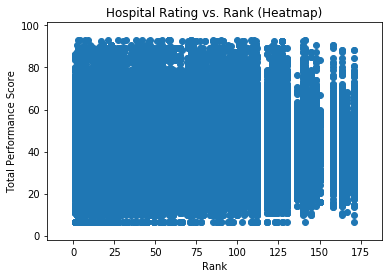

In [365]:
# Hospital Rating x Rank (Heatmap)
draw(kind='scatter',
     x=df['Rank'], xlabel='Rank',
     y=df['Total Performance Score'], ylabel='Total Performance Score',
     title='Hospital Rating vs. Rank (Heatmap)',
#      save='hospital_rating_vs_rank_heatmap.png', dpi=300,
     show=True)

/home/ravirao/Scripts/framework/draw.py:336: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



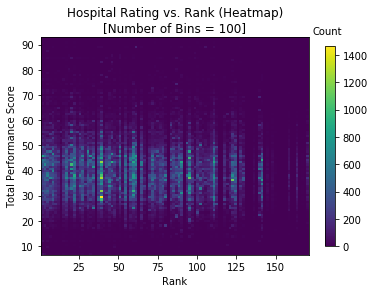

Rank,"(0.83, 2.7]","(2.7, 4.4]","(4.4, 6.1]","(6.1, 7.8]","(7.8, 9.5]","(9.5, 11.2]","(11.2, 12.9]","(12.9, 14.6]","(14.6, 16.3]","(16.3, 18]",...,"(154, 155.7]","(155.7, 157.4]","(157.4, 159.1]","(159.1, 160.8]","(160.8, 162.5]","(162.5, 164.2]","(164.2, 165.9]","(165.9, 167.6]","(167.6, 169.3]","(169.3, 171]"
Total Performance Score,,,,,,,,,,,,,,,,,,,,,
"(6.514, 7.463]",61.0,33.0,3.0,7.0,2.0,9.0,6.0,1.0,16.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
"(7.463, 8.325]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(8.325, 9.188]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(9.188, 10.0503]",8.0,1.0,25.0,2.0,2.0,4.0,4.0,1.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
"(10.0503, 10.913]",4.0,2.0,3.0,2.0,3.0,2.0,2.0,0.0,4.0,6.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"(10.913, 11.775]",3.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"(11.775, 12.638]",56.0,8.0,29.0,7.0,4.0,9.0,3.0,1.0,20.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(12.638, 13.501]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(13.501, 14.363]",9.0,11.0,8.0,25.0,4.0,4.0,5.0,0.0,7.0,4.0,...,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0


In [409]:
# Hospital Rating x Rank (Heatmap)
aggregate_bins(df=df.dropna(),
               x='Rank', xlabel='Rank',
               y='Total Performance Score', ylabel='Total Performance Score',
               n=100,
               title='Hospital Rating vs. Rank (Heatmap)\n[Number of Bins = 100]',
               save='hospital_rating_vs_rank_heatmap_bins_100.png', dpi=300,
               fillna=0,
               show=True)

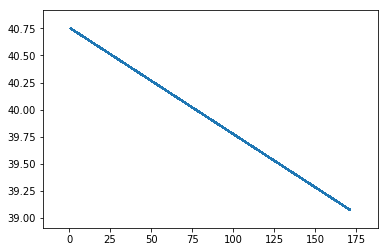

 
-0.009834 x + 40.76
SpearmanrResult(correlation=-0.041719107918073331, pvalue=2.4083546561334045e-230)


In [381]:
# Number of Practitioners by Rank (Histogram)
# bins=len(df['Rank'].unique())
x,y=df['Rank'], df['Total Performance Score']
# x=x[:-1]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
draw(kind='plot', x=x, y=p(x), show=True)
print(p, spearmanr(x, y), sep='\n')

 
-0.009834 x + 40.76
SpearmanrResult(correlation=-0.041719107918073331, pvalue=2.4083546561334045e-230)


/home/ravirao/Scripts/framework/draw.py:336: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



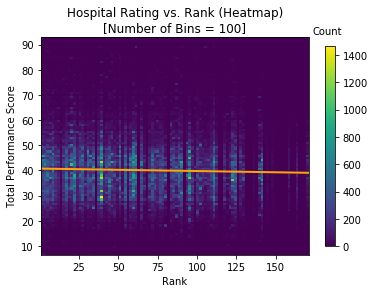

Rank,"(0.83, 2.7]","(2.7, 4.4]","(4.4, 6.1]","(6.1, 7.8]","(7.8, 9.5]","(9.5, 11.2]","(11.2, 12.9]","(12.9, 14.6]","(14.6, 16.3]","(16.3, 18]",...,"(154, 155.7]","(155.7, 157.4]","(157.4, 159.1]","(159.1, 160.8]","(160.8, 162.5]","(162.5, 164.2]","(164.2, 165.9]","(165.9, 167.6]","(167.6, 169.3]","(169.3, 171]"
Total Performance Score,,,,,,,,,,,,,,,,,,,,,
"(6.514, 7.463]",61.0,33.0,3.0,7.0,2.0,9.0,6.0,1.0,16.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
"(7.463, 8.325]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(8.325, 9.188]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(9.188, 10.0503]",8.0,1.0,25.0,2.0,2.0,4.0,4.0,1.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
"(10.0503, 10.913]",4.0,2.0,3.0,2.0,3.0,2.0,2.0,0.0,4.0,6.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"(10.913, 11.775]",3.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"(11.775, 12.638]",56.0,8.0,29.0,7.0,4.0,9.0,3.0,1.0,20.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(12.638, 13.501]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(13.501, 14.363]",9.0,11.0,8.0,25.0,4.0,4.0,5.0,0.0,7.0,4.0,...,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0


In [432]:
# Hospital Rating x Rank (Heatmap)
x,y=df['Rank'], df['Total Performance Score']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
print(p, spearmanr(x, y), sep='\n')
x=[x.as_matrix().min(), x.as_matrix().max()]
aggregate_bins(
   ax=draw(title='Hospital Rating vs. Rank (Heatmap)\n[Number of Bins = 100]',
           xlabel='Rank', ylabel='Total Performance Score',
           x=x, y=p(x), kind='plot', linewidth=2, c='orange'),
   df=df.dropna(),
   x='Rank', y='Total Performance Score', n=100,
   fillna=0,
#    save='hospital_rating_vs_rank_heatmap_bins_100_regression.png', dpi=300,
   show=True)

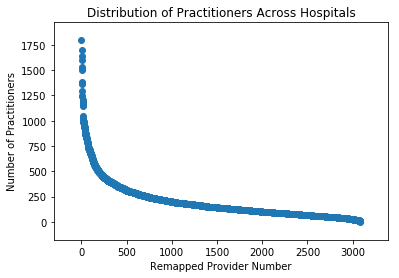

In [460]:
# Number of Practitioners by Rank (Histogram)
# draw(kind='scatter', ylabel='Number of Practitioners',
#      x=df['Provider Number New'].count().sort_values(), xlabel='Rank',
#      bins=sorted(df['Provider Number New'].unique()),
#      title='Number of Practitioners by Rank (Histogram)',
# #      save='practitioners_by_rank_histogram.png', dpi=300,
#      show=True)
# draw(df.groupby('Provider Number New')['Provider Number'].count().hist(bins=3000),
#      show=True)
draw(kind='scatter',
     y=df.groupby('Provider Number New')['Provider Number'].count().sort_values(ascending=False),
     xlabel='Remapped Provider Number',
     ylabel='Number of Practitioners',
     title='Distribution of Practitioners Across Hospitals',
     save='distribution_of_practitioners_across_hospitals.png', dpi=300,
     show=True)

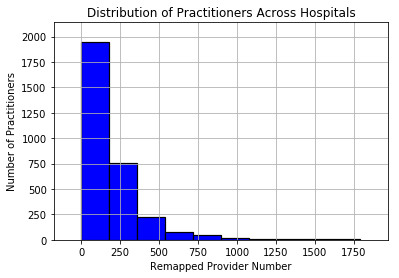

In [473]:
draw(kind='hist',
     x=df.groupby('Provider Number New')['Provider Number'].count(),
     xlabel='Remapped Provider Number',
     ylabel='Number of Practitioners',
     title='Distribution of Practitioners Across Hospitals',
     bins=10, edgecolor='black', linewidth=1.2,
     grid='both', color='b',
     save='distribution_of_practitioners_across_hospitals_hist.png', dpi=300,
     show=True)